<a href="https://colab.research.google.com/github/aishahoguns/Machine-Learning-Projects/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Exploratory Data Analysis

In [8]:
data = pd.read_csv('/content/BankChurners.csv')

In [9]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [11]:
X = data.iloc[:, 2:21]
y = data.iloc[2]

In [12]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [14]:
y = data['Attrition_Flag']

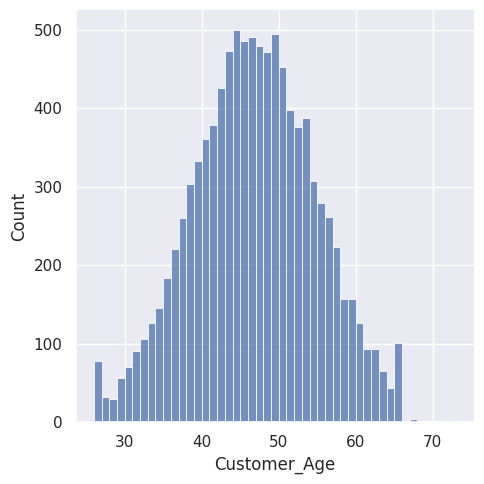

In [15]:
sns.displot(X['Customer_Age'])

<Axes: xlabel='Gender', ylabel='count'>

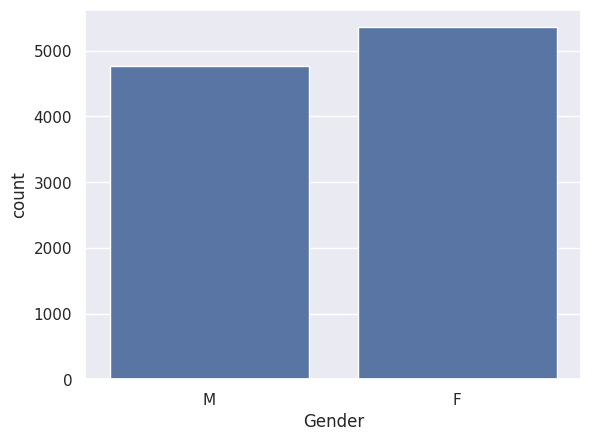

In [16]:
sns.countplot(data = X, x = 'Gender')

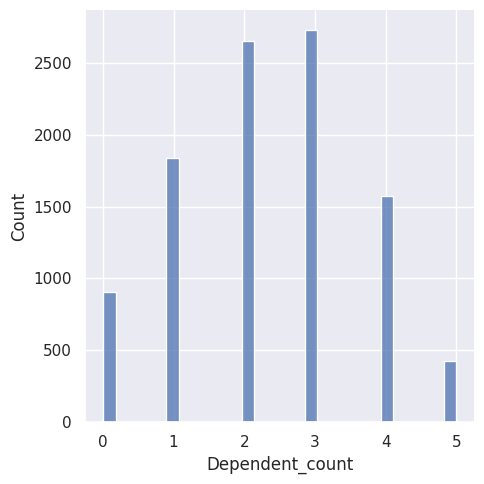

In [17]:
sns.displot(X['Dependent_count'])

In [18]:
unique_value_counts = X.nunique().to_dict()


In [19]:
discrete_features = []
for (key, value) in unique_value_counts.items():
  if value > 10:
    discrete_features.append((key))



In [20]:
cat_cols = X.select_dtypes('object')
cat_cols_dummies = pd.get_dummies(cat_cols)

In [21]:
cat_cols

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...
10122,M,Graduate,Single,$40K - $60K,Blue
10123,M,Unknown,Divorced,$40K - $60K,Blue
10124,F,High School,Married,Less than $40K,Blue
10125,M,Graduate,Unknown,$40K - $60K,Blue


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
from imblearn.over_sampling import SMOTE

In [23]:
class PredictPipeline():
  def __init__(self):
    self.pipeline = None
    self.model = None
  def preprocessor(self,data):
    cat_cols = data.select_dtypes('object').columns
    num_cols = data.columns.difference(cat_cols)

    self.pipeline = Pipeline(steps=[
            ('preprocessor', ColumnTransformer(transformers=[
                ('num', StandardScaler(), num_cols),
                ('cat', Pipeline([
                    ('onehot', OneHotEncoder()),
                    ('pca', PCA(n_components=5))
                ]), cat_cols)
            ]))
        ])

    return self.pipeline.fit_transform(data)

    def train_model(self,X,y):
      X_preprocessed = self.preprocessor(X)

      self.model = tf.keras.Sequential()
      self.model.add(Dense(8,input_shape = X_preprocessed.shape[0],activation = 'relu'))
      self.model.add(Dropout(0.25))
      self.model.add(Dense(units = 10,activation = 'relu'))
      self.model.add(Dropout(0.25))
      self.model.add(Dense(units = 10,activation = 'relu'))
      self.model.add(Dropout(0.25))
      self.model.add(Dense(units = 10, activation = 'relu'))
      self.model.add(Dropout(0.25))
      self.model.add(Dense(1, activation = 'sigmoid'))

      self.model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = 'accuracy')

      self.model.fit(X,y, epochs=100, validation_split = 0.3,callbacks = [EarlyStopping(patience = 14)], verbose = 2)


    def evaluate(self,X_test,y_test):
      y_pred = self.model.predict(X_test)
      cm = confusion_matrix(y_pred,y_test)
      accuracy = accuracy_score(y_pred,y_test)
      recall = recall_score(y_pred,y_test)
      return cm,accuracy,recall








In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

class PredictPipeline():
    def __init__(self):
        self.pipeline = None
        self.model = None

    def preprocessor(self, data):
        cat_cols = data.select_dtypes('object').columns
        num_cols = data.columns.difference(cat_cols)

        self.pipeline = Pipeline(steps=[
            ('preprocessor', ColumnTransformer(transformers=[
                ('num', StandardScaler(), num_cols),
                ('cat', Pipeline([
                    ('onehot', OneHotEncoder())
                ]), cat_cols)
            ]))
        ])

        return self.pipeline.fit_transform(data)

    def train_model(self, X, y):
        X_preprocessed = self.preprocessor(X)
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_preprocessed, y)

        self.model = Sequential()
        self.model.add(Dense(8, input_shape=(X_train_resampled.shape[1],), activation='relu'))
        self.model.add(Dropout(0.25))
        self.model.add(Dense(units=10, activation='relu'))
        self.model.add(Dropout(0.25))
        self.model.add(Dense(units=10, activation='relu'))
        self.model.add(Dropout(0.25))
        self.model.add(Dense(units=10, activation='relu'))
        self.model.add(Dropout(0.25))
        self.model.add(Dense(1, activation='sigmoid'))

        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        self.model.fit(X_preprocessed, y, epochs=100, validation_split=0.3,
                       callbacks=[EarlyStopping(patience=14, monitor= 'val_loss')], verbose=2)

    def evaluate(self, X_test, y_test):
        X_test_preprocessed = self.preprocessor(X_test)
        y_pred = (self.model.predict(X_test_preprocessed) > 0.5).astype("int32")
        cm = confusion_matrix(y_pred, y_test)
        accuracy = accuracy_score(y_pred, y_test)
        recall = recall_score(y_pred, y_test)
        return cm, accuracy, recall


In [25]:
y_dummies = y.map({'Attrited Customer':0,'Existing Customer':1})
y_dummies

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y_dummies,test_size = 0.2,random_state=45)


In [27]:
pipeline = PredictPipeline()

In [28]:

pipeline.train_model(X_train,y_train)

Epoch 1/100
178/178 - 2s - loss: 0.5401 - accuracy: 0.7915 - val_loss: 0.4120 - val_accuracy: 0.8371 - 2s/epoch - 11ms/step
Epoch 2/100
178/178 - 0s - loss: 0.4196 - accuracy: 0.8392 - val_loss: 0.3669 - val_accuracy: 0.8371 - 428ms/epoch - 2ms/step
Epoch 3/100
178/178 - 0s - loss: 0.3818 - accuracy: 0.8392 - val_loss: 0.3347 - val_accuracy: 0.8371 - 442ms/epoch - 2ms/step
Epoch 4/100
178/178 - 0s - loss: 0.3502 - accuracy: 0.8392 - val_loss: 0.3172 - val_accuracy: 0.8371 - 421ms/epoch - 2ms/step
Epoch 5/100
178/178 - 1s - loss: 0.3418 - accuracy: 0.8392 - val_loss: 0.3097 - val_accuracy: 0.8371 - 671ms/epoch - 4ms/step
Epoch 6/100
178/178 - 1s - loss: 0.3270 - accuracy: 0.8392 - val_loss: 0.2976 - val_accuracy: 0.8371 - 644ms/epoch - 4ms/step
Epoch 7/100
178/178 - 1s - loss: 0.3193 - accuracy: 0.8392 - val_loss: 0.2913 - val_accuracy: 0.8371 - 1s/epoch - 6ms/step
Epoch 8/100
178/178 - 1s - loss: 0.3064 - accuracy: 0.8392 - val_loss: 0.2857 - val_accuracy: 0.8371 - 764ms/epoch - 4ms/st

In [29]:
pipeline.evaluate(X_test,y_test)

64/64 [==============================] - 0s 1ms/step


(array([[ 243,   84],
        [  76, 1623]]),
 0.9210266535044422,
 0.9552678045909359)

In [30]:
y_dummies.value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [31]:
y_test.value_counts()

1    1707
0     319
Name: Attrition_Flag, dtype: int64

In [34]:
cm = np.array([[ 243,   84],
        [  76, 1623]])

<Axes: >

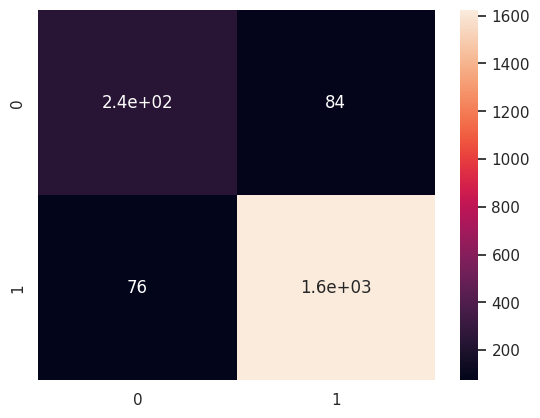

In [35]:
sns.heatmap(cm, annot=True)

# New section